In [ ]:
# prompt: import a deta set

import pandas as pd

# Replace 'your_dataset.csv' with the actual path to your dataset file
# You can upload the file to your Colab environment or access it from Google Drive.
data = pd.read_csv('BostonHousing.csv')

# Now you can work with the dataset in 'data' variable
print(data.head())


      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


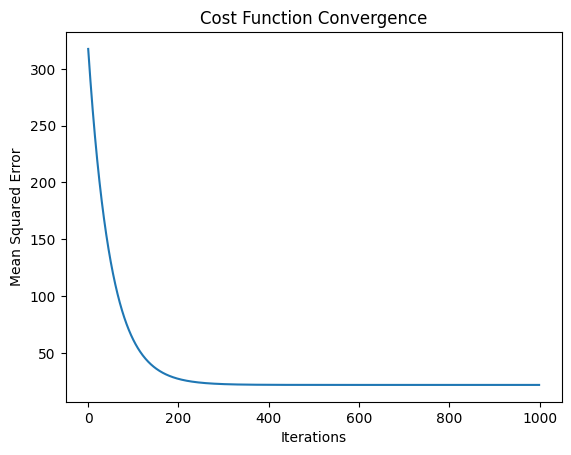

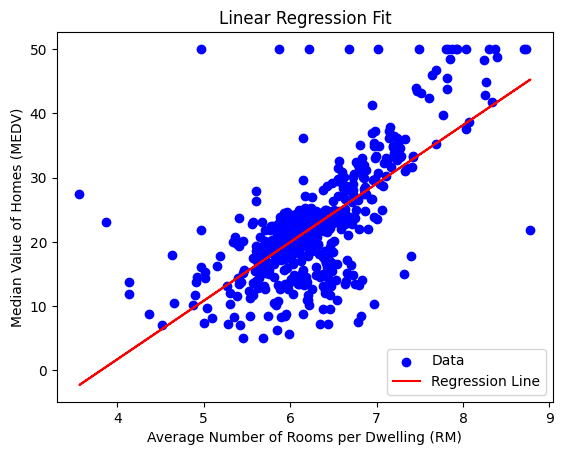

Final parameters: [22.53179128  6.38866806]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('BostonHousing.csv')

# Extract feature (X) and target (y)
X = data['rm'].values  # Average number of rooms per dwelling
y = data['medv'].values  # Median value of owner-occupied homes

# Normalize feature
X_mean = np.mean(X)
X_std = np.std(X)
X = (X - X_mean) / X_std  # Standardization

# Add bias term
X = np.c_[np.ones(X.shape[0]), X]  # Add a column of ones for bias term

# Initialize parameters
theta = np.random.randn(2)  # Two parameters (bias and weight)
learning_rate = 0.01
iterations = 1000

# Mean Squared Error function
def compute_mse(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    return (1 / (2 * m)) * np.sum((predictions - y) ** 2)

# Gradient Descent function
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    history = []
    for _ in range(iterations):
        gradients = (1 / m) * X.T.dot(X.dot(theta) - y)
        theta -= learning_rate * gradients
        history.append(compute_mse(X, y, theta))
    return theta, history

# Train the model
theta, history = gradient_descent(X, y, theta, learning_rate, iterations)

# Plot cost function history
plt.plot(history)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.title('Cost Function Convergence')
plt.show()

# Plot regression line
plt.scatter(data['rm'], y, color='blue', label='Data')
plt.plot(data['rm'], X.dot(theta), color='red', label='Regression Line')
plt.xlabel('Average Number of Rooms per Dwelling (RM)')
plt.ylabel('Median Value of Homes (MEDV)')
plt.title('Linear Regression Fit')
plt.legend()
plt.show()

print(f'Final parameters: {theta}')


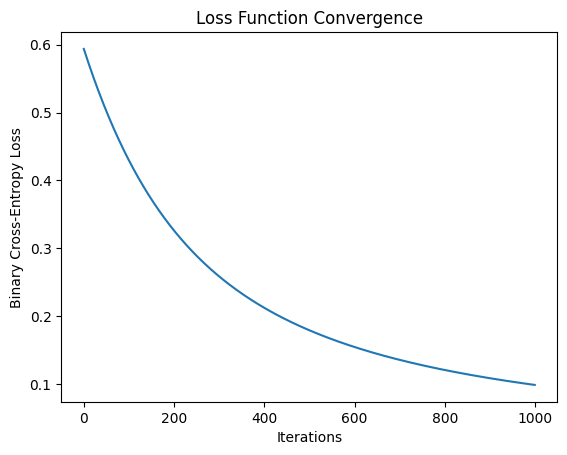

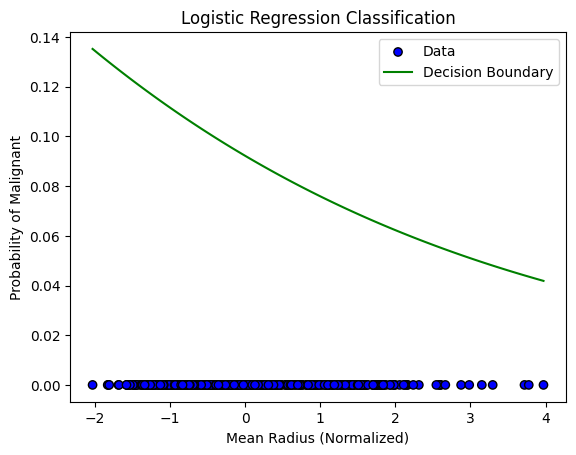

Final parameters: [-2.28685513 -0.21244456]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('breast-cancer.csv')

# Extract feature (X) and target (y)
X = data['radius_mean'].values
y = data['diagnosis'].values  # Assuming 'diagnosis' column has 0 for benign and 1 for malignant

# Convert target variable to numeric if it's in string format
y = pd.to_numeric(y, errors='coerce')
y = np.where(y > 0, 1, 0)  # Ensure binary values 0 or 1

# Normalize feature
X_mean = np.mean(X)
X_std = np.std(X)
X = (X - X_mean) / X_std

# Add bias term
X = np.c_[np.ones(X.shape[0]), X]

# Initialize parameters
theta = np.random.randn(2)
learning_rate = 0.01
iterations = 1000

# Sigmoid activation function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Binary cross-entropy loss function
def binary_cross_entropy_loss(y_true, y_pred):
    epsilon = 1e-15  # Avoid log(0)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)  # Clip predictions to avoid log(0)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Gradient Descent function
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    loss_history = []
    for _ in range(iterations):
        z = X.dot(theta)
        y_pred = sigmoid(z)
        gradient = (1 / m) * X.T.dot(y_pred - y)
        theta -= learning_rate * gradient
        loss = binary_cross_entropy_loss(y, y_pred)
        loss_history.append(loss)
    return theta, loss_history

# Train the model
theta, loss_history = gradient_descent(X, y, theta, learning_rate, iterations)

# Plot loss function history
plt.plot(loss_history)
plt.xlabel('Iterations')
plt.ylabel('Binary Cross-Entropy Loss')
plt.title('Loss Function Convergence')
plt.show()

# Plot decision boundary
plt.scatter(X[:, 1], y, c=y, cmap='bwr', edgecolors='k', label='Data')
x_boundary = np.linspace(np.min(X[:, 1]), np.max(X[:, 1]), 100)
y_boundary = sigmoid(theta[0] + theta[1] * x_boundary)  # Decision boundary curve
plt.plot(x_boundary, y_boundary, color='green', label='Decision Boundary')
plt.xlabel('Mean Radius (Normalized)')
plt.ylabel('Probability of Malignant')
plt.title('Logistic Regression Classification')
plt.legend()
plt.show()

print(f'Final parameters: {theta}')


In [ ]:
#again developed and try new feature
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#lode a deta set
data = pd.read_csv('BostonHousing.csv')
#printing head
print(data.head())


      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [ ]:
# printing info of deta
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None


In [ ]:
#printng tail
print(data.tail())

        crim   zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
501  0.06263  0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273     21.0   
502  0.04527  0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273     21.0   
503  0.06076  0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273     21.0   
504  0.10959  0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273     21.0   
505  0.04741  0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273     21.0   

          b  lstat  medv  
501  391.99   9.67  22.4  
502  396.90   9.08  20.6  
503  396.90   5.64  23.9  
504  393.45   6.48  22.0  
505  396.90   7.88  11.9  


In [ ]:
#printing mean mean median mode max mid
print(data.describe())
#use the print describe to find all

             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio           b  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [ ]:
#print all the feature
print(data.columns)


Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')


In [ ]:
#checking not null values  and printing
print(data.isnull().sum())


crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


In [ ]:
#now do my all the preprocessing
#check null values
print(data.isnull())


      crim     zn  indus   chas    nox     rm    age    dis    rad    tax  \
0    False  False  False  False  False  False  False  False  False  False   
1    False  False  False  False  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
501  False  False  False  False  False  False  False  False  False  False   
502  False  False  False  False  False  False  False  False  False  False   
503  False  False  False  False  False  False  False  False  False  False   
504  False  False  False  False  False  False  False  False  False  False   
505  False  False  False  False  False  False  False  False  False  False   

     ptratio      b  lstat   medv  
0      False  False  False  False  
1  

In [ ]:
#checking not null values
print(data.notnull())

     crim    zn  indus  chas   nox    rm   age   dis   rad   tax  ptratio  \
0    True  True   True  True  True  True  True  True  True  True     True   
1    True  True   True  True  True  True  True  True  True  True     True   
2    True  True   True  True  True  True  True  True  True  True     True   
3    True  True   True  True  True  True  True  True  True  True     True   
4    True  True   True  True  True  True  True  True  True  True     True   
..    ...   ...    ...   ...   ...   ...   ...   ...   ...   ...      ...   
501  True  True   True  True  True  True  True  True  True  True     True   
502  True  True   True  True  True  True  True  True  True  True     True   
503  True  True   True  True  True  True  True  True  True  True     True   
504  True  True   True  True  True  True  True  True  True  True     True   
505  True  True   True  True  True  True  True  True  True  True     True   

        b  lstat  medv  
0    True   True  True  
1    True   True  True  


In [ ]:
#print a data set more the  20 rowa
print(data.head(20))

       crim    zn  indus  chas    nox     rm    age     dis  rad  tax  \
0   0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296   
1   0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242   
2   0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242   
3   0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222   
4   0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222   
5   0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222   
6   0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311   
7   0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311   
8   0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311   
9   0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311   
10  0.22489  12.5   7.87     0  0.524  6.377   94.3  6.3467    5  311   
11  0.11747  12.5   7.87     0  0.524  6.009   82.9  6.2267    5  311   
12  0.09378  12.5   7.87     0  0.524  5.889   39.0

In [ ]:
#find the rm avarage number of the room
avg_room_rm = data['rm'].mean()
print(avg_room_rm)

6.284634387351779


In [ ]:
#print the  both feature
print(data[['rm', 'medv']])

        rm  medv
0    6.575  24.0
1    6.421  21.6
2    7.185  34.7
3    6.998  33.4
4    7.147  36.2
..     ...   ...
501  6.593  22.4
502  6.120  20.6
503  6.976  23.9
504  6.794  22.0
505  6.030  11.9

[506 rows x 2 columns]


In [ ]:
print(data['rm'].values)

[6.575 6.421 7.185 6.998 7.147 6.43  6.012 6.172 5.631 6.004 6.377 6.009
 5.889 5.949 6.096 5.834 5.935 5.99  5.456 5.727 5.57  5.965 6.142 5.813
 5.924 5.599 5.813 6.047 6.495 6.674 5.713 6.072 5.95  5.701 6.096 5.933
 5.841 5.85  5.966 6.595 7.024 6.77  6.169 6.211 6.069 5.682 5.786 6.03
 5.399 5.602 5.963 6.115 6.511 5.998 5.888 7.249 6.383 6.816 6.145 5.927
 5.741 5.966 6.456 6.762 7.104 6.29  5.787 5.878 5.594 5.885 6.417 5.961
 6.065 6.245 6.273 6.286 6.279 6.14  6.232 5.874 6.727 6.619 6.302 6.167
 6.389 6.63  6.015 6.121 7.007 7.079 6.417 6.405 6.442 6.211 6.249 6.625
 6.163 8.069 7.82  7.416 6.727 6.781 6.405 6.137 6.167 5.851 5.836 6.127
 6.474 6.229 6.195 6.715 5.913 6.092 6.254 5.928 6.176 6.021 5.872 5.731
 5.87  6.004 5.961 5.856 5.879 5.986 5.613 5.693 6.431 5.637 6.458 6.326
 6.372 5.822 5.757 6.335 5.942 6.454 5.857 6.151 6.174 5.019 5.403 5.468
 4.903 6.13  5.628 4.926 5.186 5.597 6.122 5.404 5.012 5.709 6.129 6.152
 5.272 6.943 6.066 6.51  6.25  7.489 7.802 8.375 5.8

In [ ]:
#print all the values of msdv
print(data['medv'].values)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [ ]:
#again print all the velus
print(data.values)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 3.9690e+02 4.9800e+00 2.4000e+01]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 3.9690e+02 9.1400e+00 2.1600e+01]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 3.9283e+02 4.0300e+00 3.4700e+01]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 3.9690e+02 5.6400e+00 2.3900e+01]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 3.9345e+02 6.4800e+00 2.2000e+01]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 3.9690e+02 7.8800e+00 1.1900e+01]]


In [ ]:
# prompt: normalized feature rm with three different ways

# Load the dataset
data = pd.read_csv('BostonHousing.csv')

# Extract feature (X) and target (y)
X = data['rm'].values  # Average number of rooms per dwelling
y = data['medv'].values  # Median value of owner-occupied homes


# 1. Min-Max Scaling (Normalization)
X_min = np.min(X)
X_max = np.max(X)
X_normalized_minmax = (X - X_min) / (X_max - X_min)


# 2. Standardization (Z-score normalization)
X_mean = np.mean(X)
X_std = np.std(X)
X_normalized_standardization = (X - X_mean) / X_std


# 3. Robust Scaling
X_median = np.median(X)
X_quantile_25 = np.percentile(X, 25)
X_quantile_75 = np.percentile(X, 75)
X_normalized_robust = (X - X_median) / (X_quantile_75 - X_quantile_25)


# Print the first few values of each normalized feature for comparison
print("Original X:", X[:5])
print("Min-Max Normalized X:", X_normalized_minmax[:5])
print("Standardized X:", X_normalized_standardization[:5])
print("Robust Scaled X:", X_normalized_robust[:5])


Original X: [6.575 6.421 7.185 6.998 7.147]
Min-Max Normalized X: [0.57750527 0.5479977  0.6943859  0.65855528 0.68710481]
Standardized X: [0.41367189 0.19427445 1.28271368 1.01630251 1.22857665]
Robust Scaled X: [0.49661247 0.28794038 1.32317073 1.0697832  1.27168022]


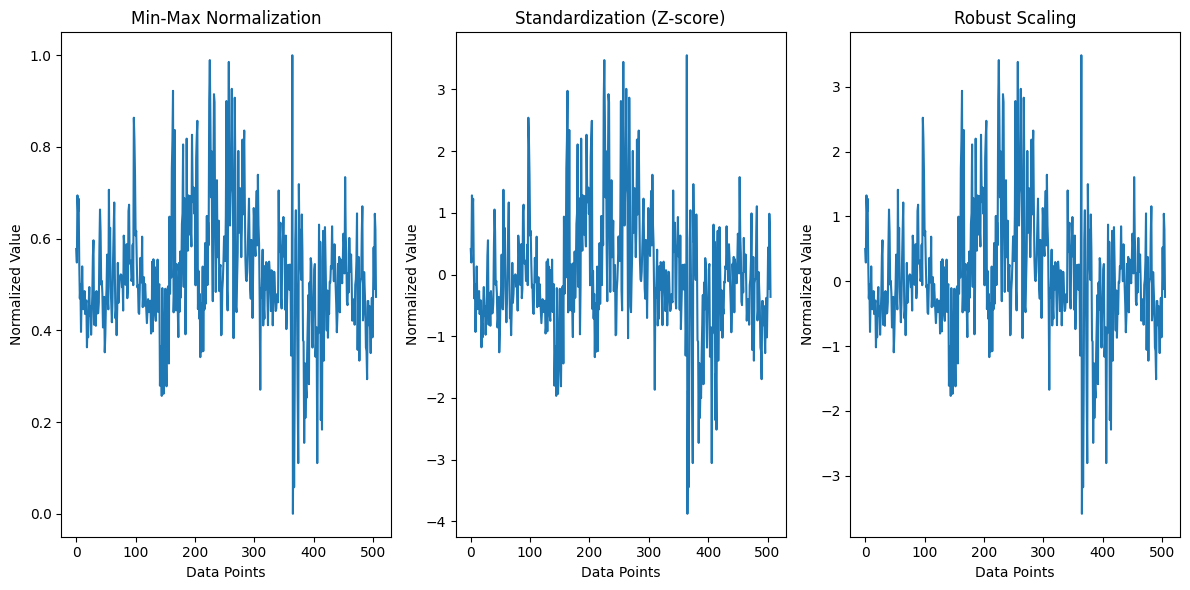

In [ ]:
# prompt: generate a graph of the normalization values

import matplotlib.pyplot as plt

# Assuming you have already calculated X_normalized_minmax, X_normalized_standardization, and X_normalized_robust as in your code

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.plot(X_normalized_minmax)
plt.title('Min-Max Normalization')
plt.xlabel('Data Points')
plt.ylabel('Normalized Value')

plt.subplot(1, 3, 2)
plt.plot(X_normalized_standardization)
plt.title('Standardization (Z-score)')
plt.xlabel('Data Points')
plt.ylabel('Normalized Value')

plt.subplot(1, 3, 3)
plt.plot(X_normalized_robust)
plt.title('Robust Scaling')
plt.xlabel('Data Points')
plt.ylabel('Normalized Value')

plt.tight_layout()
plt.show()


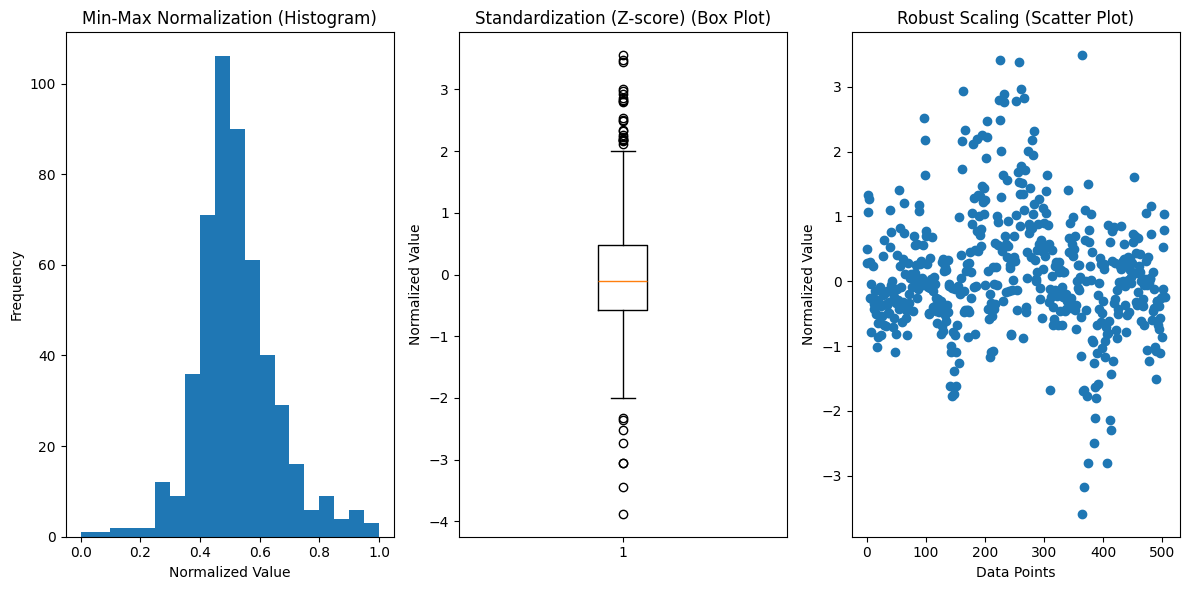

In [ ]:
# prompt: generate a different type of graph plot of every normalization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have already calculated X_normalized_minmax, X_normalized_standardization, and X_normalized_robust as in your code

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.hist(X_normalized_minmax, bins=20)
plt.title('Min-Max Normalization (Histogram)')
plt.xlabel('Normalized Value')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.boxplot(X_normalized_standardization)
plt.title('Standardization (Z-score) (Box Plot)')
plt.ylabel('Normalized Value')

plt.subplot(1, 3, 3)
plt.scatter(range(len(X_normalized_robust)), X_normalized_robust)
plt.title('Robust Scaling (Scatter Plot)')
plt.xlabel('Data Points')
plt.ylabel('Normalized Value')

plt.tight_layout()
plt.show()


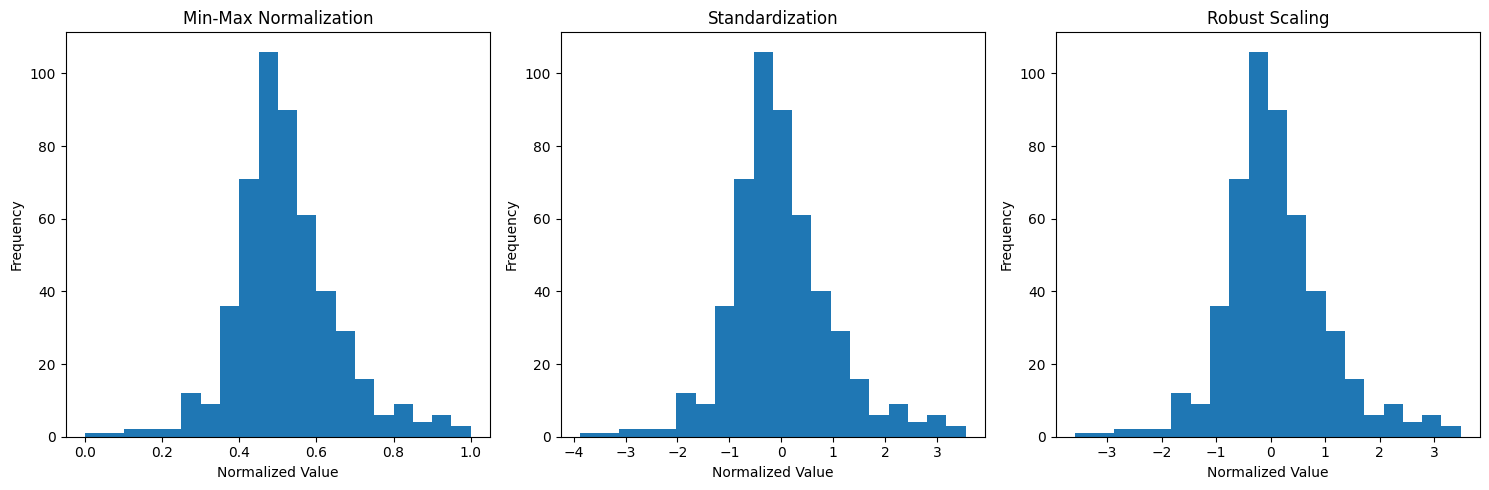

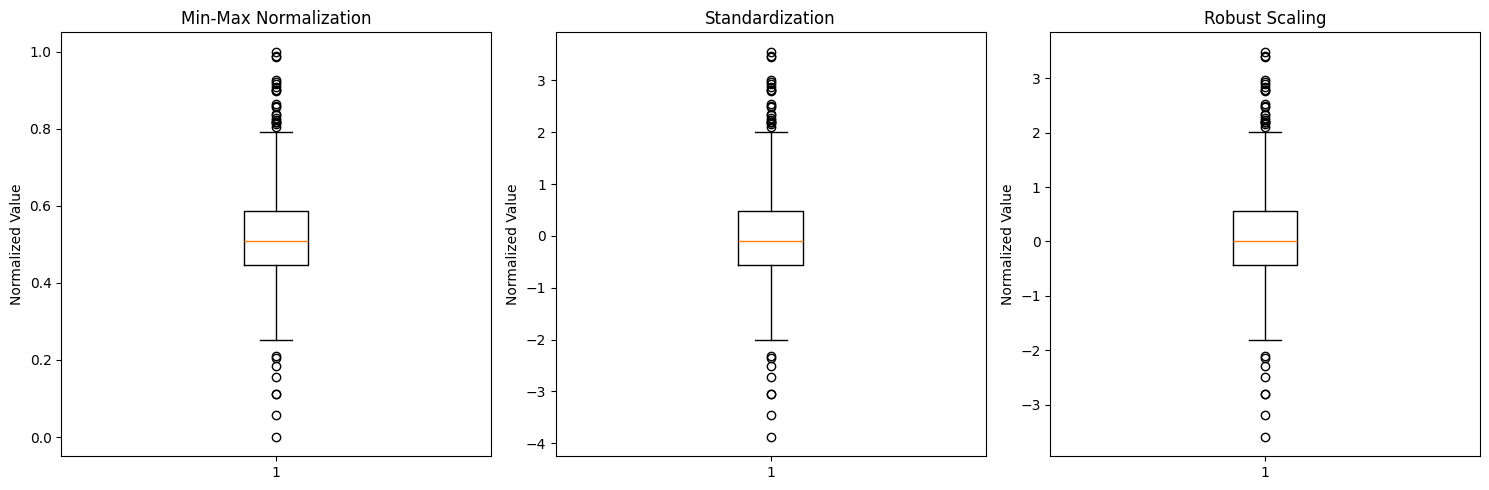

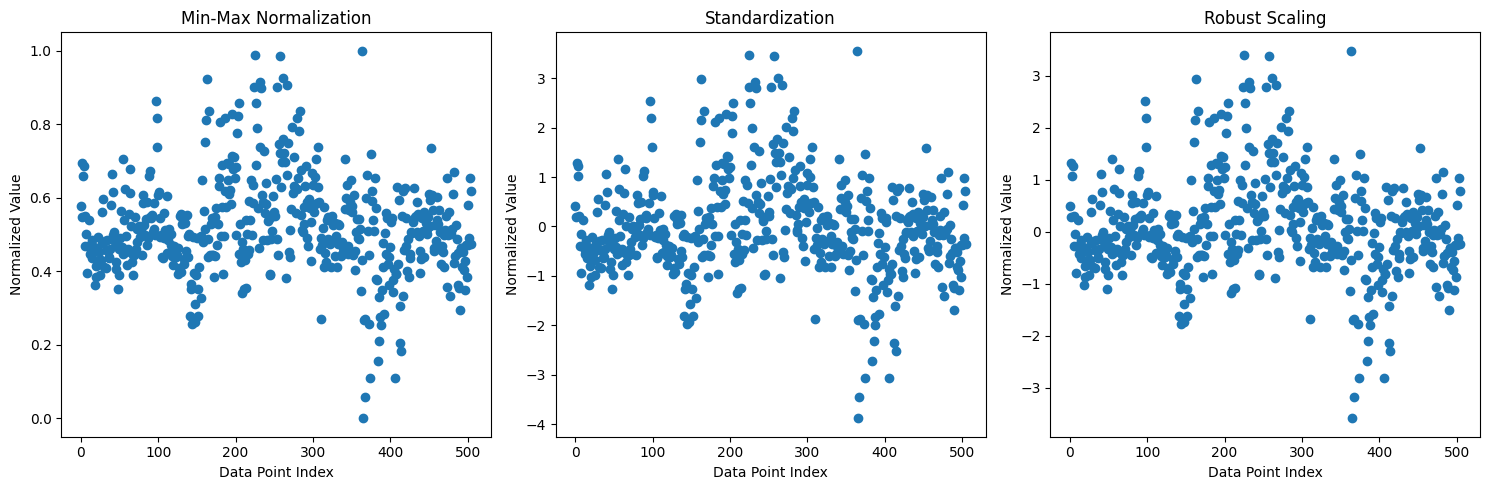

In [ ]:
# prompt: generate a different type of graph ,  plot for  every normalization mixmax . standerad , robues every noramizatio evey plot

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('BostonHousing.csv')

# Extract feature (X) and target (y)
X = data['rm'].values  # Average number of rooms per dwelling
y = data['medv'].values  # Median value of owner-occupied homes

# 1. Min-Max Scaling (Normalization)
X_min = np.min(X)
X_max = np.max(X)
X_normalized_minmax = (X - X_min) / (X_max - X_min)

# 2. Standardization (Z-score normalization)
X_mean = np.mean(X)
X_std = np.std(X)
X_normalized_standardization = (X - X_mean) / X_std

# 3. Robust Scaling
X_median = np.median(X)
X_quantile_25 = np.percentile(X, 25)
X_quantile_75 = np.percentile(X, 75)
X_normalized_robust = (X - X_median) / (X_quantile_75 - X_quantile_25)


# Create subplots for each normalization method
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(X_normalized_minmax, bins=20)
plt.title('Min-Max Normalization')
plt.xlabel('Normalized Value')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(X_normalized_standardization, bins=20)
plt.title('Standardization')
plt.xlabel('Normalized Value')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(X_normalized_robust, bins=20)
plt.title('Robust Scaling')
plt.xlabel('Normalized Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


# Create box plots for each normalization method
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.boxplot(X_normalized_minmax)
plt.title('Min-Max Normalization')
plt.ylabel('Normalized Value')

plt.subplot(1, 3, 2)
plt.boxplot(X_normalized_standardization)
plt.title('Standardization')
plt.ylabel('Normalized Value')

plt.subplot(1, 3, 3)
plt.boxplot(X_normalized_robust)
plt.title('Robust Scaling')
plt.ylabel('Normalized Value')

plt.tight_layout()
plt.show()

# Create scatter plots for each normalization method
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(range(len(X_normalized_minmax)), X_normalized_minmax)
plt.title('Min-Max Normalization')
plt.xlabel('Data Point Index')
plt.ylabel('Normalized Value')

plt.subplot(1, 3, 2)
plt.scatter(range(len(X_normalized_standardization)), X_normalized_standardization)
plt.title('Standardization')
plt.xlabel('Data Point Index')
plt.ylabel('Normalized Value')

plt.subplot(1, 3, 3)
plt.scatter(range(len(X_normalized_robust)), X_normalized_robust)
plt.title('Robust Scaling')
plt.xlabel('Data Point Index')
plt.ylabel('Normalized Value')

plt.tight_layout()
plt.show()


In [ ]:
# prompt: generate  Mean Squared Error (MSE) as the loss function.

# Assuming you have already loaded and preprocessed your data (X and y)

# ... (your existing code for loading and preprocessing data) ...


# Normalize feature (using standardization in this example)
X_mean = np.mean(X)
X_std = np.std(X)
X = (X - X_mean) / X_std  # Standardization

# Add bias term
X = np.c_[np.ones(X.shape[0]), X]  # Add a column of ones for bias term

# Initialize parameters
theta = np.random.randn(2)  # Two parameters (bias and weight)
learning_rate = 0.01
iterations = 1000

# Mean Squared Error function (MSE) as the loss function
def compute_mse(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    return (1 / (2 * m)) * np.sum((predictions - y) ** 2)

# Gradient Descent function
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    history = []
    for _ in range(iterations):
        gradients = (1 / m) * X.T.dot(X.dot(theta) - y)
        theta -= learning_rate * gradients
        history.append(compute_mse(X, y, theta))
    return theta, history

# Train the model
theta, history = gradient_descent(X, y, theta, learning_rate, iterations)

# ... (rest of your code for plotting and analysis) ...


In [ ]:
# prompt: print every setp Mean Squared Error (MSE) as the loss function.

# Load the dataset
data = pd.read_csv('BostonHousing.csv')

# Extract feature (X) and target (y)
X = data['rm'].values  # Average number of rooms per dwelling
y = data['medv'].values  # Median value of owner-occupied homes

# Normalize feature (using standardization in this example)
X_mean = np.mean(X)
X_std = np.std(X)
X = (X - X_mean) / X_std  # Standardization

# Add bias term
X = np.c_[np.ones(X.shape[0]), X]  # Add a column of ones for bias term

# Initialize parameters
theta = np.random.randn(2)  # Two parameters (bias and weight)
learning_rate = 0.01
iterations = 1000

# Mean Squared Error function (MSE) as the loss function
def compute_mse(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    return (1 / (2 * m)) * np.sum((predictions - y) ** 2)

# Gradient Descent function
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    history = []
    for i in range(iterations):
        gradients = (1 / m) * X.T.dot(X.dot(theta) - y)
        theta -= learning_rate * gradients
        mse = compute_mse(X, y, theta)
        history.append(mse)
        print(f"Iteration {i+1}: MSE = {mse}")  # Print MSE at each step
    return theta, history

# Train the model
theta, history = gradient_descent(X, y, theta, learning_rate, iterations)

# ... (rest of your code for plotting and analysis) ...


Iteration 1: MSE = 296.9781398544092
Iteration 2: MSE = 291.5021003614296
Iteration 3: MSE = 286.1350340543603
Iteration 4: MSE = 280.87477236680166
Iteration 5: MSE = 275.71918988682546
Iteration 6: MSE = 270.6662034982008
Iteration 7: MSE = 265.7137715387097
Iteration 8: MSE = 260.8598929752125
Iteration 9: MSE = 256.1026065951289
Iteration 10: MSE = 251.43999021400901
Iteration 11: MSE = 246.87015989887337
Iteration 12: MSE = 242.39126920700895
Iteration 13: MSE = 238.00150843991258
Iteration 14: MSE = 233.69910391208148
Iteration 15: MSE = 229.4823172343542
Iteration 16: MSE = 225.3494446115137
Iteration 17: MSE = 221.2988161538677
Iteration 18: MSE = 217.32879520252885
Iteration 19: MSE = 213.43777766812167
Iteration 20: MSE = 209.6241913826492
Iteration 21: MSE = 205.8864954642576
Iteration 22: MSE = 202.22317969464203
Iteration 23: MSE = 198.6327639088418
Iteration 24: MSE = 195.11379739717898
Iteration 25: MSE = 191.66485831909827
Iteration 26: MSE = 188.28455312867132
Iteratio